In [53]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

iris_data = pd.read_csv("iris.csv", encoding="utf-8")
# 붓꽃 데이터를 레이블과 입력 데이터로 분리하기
y_labels = iris_data.loc[:,"Name"]
x_data = iris_data.loc[:,["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
# 레이블 데이터를 One-hot 형식으로 변환하기
labels = {'Iris-setosa': [1, 0, 0], 'Iris-versicolor': [0, 1, 0], 'Iris-virginica': [0, 0, 1]}
y_nums = list(map(lambda v : labels[v] , y_labels))

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_nums, train_size=0.8)

D:\Program Files\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [57]:
x = tf.placeholder(tf.float32, [None, 4])
y_ = tf.placeholder(tf.float32, [None, 3])

w = tf.Variable(tf.zeros([4, 3]))
b = tf.Variable(tf.zeros([3]))

y = tf.nn.softmax(tf.matmul(x, w) + b)

cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
optimizer = tf.train.AdamOptimizer(0.05)
train = optimizer.minimize(cross_entropy)
predict = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(predict, tf.float32))

In [59]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
# 학습하기
train_feed_dict = {x: x_train, y_: y_train}
for step in range(300):
    sess.run(train, feed_dict=train_feed_dict)
print("ok")
# 테스트 테이터를 사용해서 예측하고 최종 정답률 구하기

acc = sess.run(accuracy, feed_dict={x: x_test, y_: y_test})
print("정답률=", acc)

ok
정답률= 0.96666664


In [61]:
# 학습 상태 출력하기
train_feed_dict = {x: x_train, y_: y_train}
test_feed_dict={x: x_test}
for i in range(5001):
    sess.run(train, feed_dict=train_feed_dict)
    if(i % 100 == 0 and i > 1):
        acc = sess.run(accuracy, feed_dict={x: x_test, y_: y_test})
        print('step=', i, "accuracy=", acc)
print("ok")

step= 100 accuracy= 0.96666664
step= 200 accuracy= 0.96666664
step= 300 accuracy= 0.96666664
step= 400 accuracy= 0.96666664
step= 500 accuracy= 0.96666664
step= 600 accuracy= 0.96666664
step= 700 accuracy= 0.96666664
step= 800 accuracy= 0.96666664
step= 900 accuracy= 0.96666664
step= 1000 accuracy= 0.96666664
step= 1100 accuracy= 0.96666664
step= 1200 accuracy= 0.96666664
step= 1300 accuracy= 0.96666664
step= 1400 accuracy= 0.96666664
step= 1500 accuracy= 0.96666664
step= 1600 accuracy= 0.96666664
step= 1700 accuracy= 0.96666664
step= 1800 accuracy= 0.96666664
step= 1900 accuracy= 0.96666664
step= 2000 accuracy= 0.96666664
step= 2100 accuracy= 0.96666664
step= 2200 accuracy= 0.96666664
step= 2300 accuracy= 0.96666664
step= 2400 accuracy= 0.96666664
step= 2500 accuracy= 0.96666664
step= 2600 accuracy= 0.96666664
step= 2700 accuracy= 0.96666664
step= 2800 accuracy= 0.96666664
step= 2900 accuracy= 0.96666664
step= 3000 accuracy= 0.96666664
step= 3100 accuracy= 0.96666664
step= 3200 accura

In [62]:
import tensorflow.contrib.keras as keras
import numpy as np
import pandas as pd

iris_data = pd.read_csv("iris.csv", encoding="utf-8")
# 붓꽃 데이터를 레이블과 입력 데이터로 분리하기
y_labels = iris_data.loc[:,"Name"]
x_data = iris_data.loc[:,["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
# 레이블 데이터를 One-hot 형식으로 변환하기
labels = {'Iris-setosa': [1, 0, 0], 'Iris-versicolor': [0, 1, 0], 'Iris-virginica': [0, 0, 1]}
y_nums = np.array(list(map(lambda v : labels[v] , y_labels)))
x_data = np.array(x_data)
# 학습 전용과 테스트 전용 분리하기
x_train, x_test, y_train, y_test = train_test_split(x_data, y_nums, train_size=0.8)
# 모델의 구조 정의하기
Dense = keras.layers.Dense
model = keras.models.Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))
# 모델 구축하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 학습 실행하기
model.fit(np.array(x_train), np.array(y_train), batch_size=20, epochs=300)
# validation_data=(x_test, y_test))
# 데이터 평가하기
score = model.evaluate(x_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])

Instructions for updating:
Use tf.cast instead.
Epoch 1/300
120/120 [==============================] - 4s 30ms/sample - loss: 3.1848 - acc: 0.3583
Epoch 2/300
120/120 [==============================] - 0s 75us/sample - loss: 2.9812 - acc: 0.3583
Epoch 3/300
120/120 [==============================] - 0s 66us/sample - loss: 2.7766 - acc: 0.3583
Epoch 4/300
120/120 [==============================] - 0s 83us/sample - loss: 2.5904 - acc: 0.3583
Epoch 5/300
120/120 [==============================] - 0s 83us/sample - loss: 2.3976 - acc: 0.3583
Epoch 6/300
120/120 [==============================] - 0s 75us/sample - loss: 2.2185 - acc: 0.3583
Epoch 7/300
120/120 [==============================] - 0s 66us/sample - loss: 2.0388 - acc: 0.3583
Epoch 8/300
120/120 [==============================] - 0s 83us/sample - loss: 1.8644 - acc: 0.3583
Epoch 9/300
120/120 [==============================] - 0s 75us/sample - loss: 1.7114 - acc: 0.3583
Epoch 10/300
120/120 [==============================] - 0s 10

120/120 [==============================] - 0s 66us/sample - loss: 0.4846 - acc: 0.8833
Epoch 81/300
120/120 [==============================] - 0s 66us/sample - loss: 0.4818 - acc: 0.8833
Epoch 82/300
120/120 [==============================] - 0s 66us/sample - loss: 0.4800 - acc: 0.8917
Epoch 83/300
120/120 [==============================] - 0s 66us/sample - loss: 0.4787 - acc: 0.8833
Epoch 84/300
120/120 [==============================] - 0s 67us/sample - loss: 0.4752 - acc: 0.8917
Epoch 85/300
120/120 [==============================] - 0s 66us/sample - loss: 0.4729 - acc: 0.8833
Epoch 86/300
120/120 [==============================] - 0s 75us/sample - loss: 0.4707 - acc: 0.8833
Epoch 87/300
120/120 [==============================] - 0s 75us/sample - loss: 0.4684 - acc: 0.8917
Epoch 88/300
120/120 [==============================] - 0s 66us/sample - loss: 0.4665 - acc: 0.9000
Epoch 89/300
120/120 [==============================] - 0s 83us/sample - loss: 0.4641 - acc: 0.8833
Epoch 90/300


120/120 [==============================] - 0s 100us/sample - loss: 0.3380 - acc: 0.9667
Epoch 162/300
120/120 [==============================] - 0s 75us/sample - loss: 0.3365 - acc: 0.9667
Epoch 163/300
120/120 [==============================] - 0s 66us/sample - loss: 0.3349 - acc: 0.9667
Epoch 164/300
120/120 [==============================] - 0s 66us/sample - loss: 0.3337 - acc: 0.9667
Epoch 165/300
120/120 [==============================] - 0s 83us/sample - loss: 0.3318 - acc: 0.9667
Epoch 166/300
120/120 [==============================] - 0s 66us/sample - loss: 0.3302 - acc: 0.9667
Epoch 167/300
120/120 [==============================] - 0s 75us/sample - loss: 0.3289 - acc: 0.9667
Epoch 168/300
120/120 [==============================] - 0s 91us/sample - loss: 0.3273 - acc: 0.9667
Epoch 169/300
120/120 [==============================] - 0s 91us/sample - loss: 0.3258 - acc: 0.9667
Epoch 170/300
120/120 [==============================] - 0s 83us/sample - loss: 0.3243 - acc: 0.9667
Epo

120/120 [==============================] - 0s 66us/sample - loss: 0.2281 - acc: 0.9750
Epoch 243/300
120/120 [==============================] - 0s 91us/sample - loss: 0.2270 - acc: 0.9750
Epoch 244/300
120/120 [==============================] - 0s 75us/sample - loss: 0.2257 - acc: 0.9750
Epoch 245/300
120/120 [==============================] - 0s 75us/sample - loss: 0.2246 - acc: 0.9750
Epoch 246/300
120/120 [==============================] - 0s 75us/sample - loss: 0.2235 - acc: 0.9750
Epoch 247/300
120/120 [==============================] - 0s 66us/sample - loss: 0.2225 - acc: 0.9750
Epoch 248/300
120/120 [==============================] - 0s 100us/sample - loss: 0.2216 - acc: 0.9750
Epoch 249/300
120/120 [==============================] - 0s 75us/sample - loss: 0.2202 - acc: 0.9750
Epoch 250/300
120/120 [==============================] - 0s 75us/sample - loss: 0.2192 - acc: 0.9750
Epoch 251/300
120/120 [==============================] - 0s 75us/sample - loss: 0.2181 - acc: 0.9750
Epo

11493376/11490434 [==============================] - 9s 1us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 163s 3ms/step - loss: 0.2244 - acc: 0.9319 - val_loss: 0.0514 - val_acc: 0.9829
Epoch 2/12
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0815 - acc: 0.9757 - val_loss: 0.0369 - val_acc: 0.9877
Epoch 3/12
60000/60000 [==============================] - 176s 3ms/step - loss: 0.0638 - acc: 0.9812 - val_loss: 0.0334 - val_acc: 0.9885
Epoch 4/12
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0550 - acc: 0.9841 - val_loss: 0.0328 - val_acc: 0.9898
Epoch 5/12
60000/60000 [==============================] - 169s 3ms/step - loss: 0.0484 - acc: 0.9857 - val_loss: 0.0320 - val_acc: 0.9910
Epoch 6/12
60000/60000 [==============================] - 189s 3ms/step - loss: 

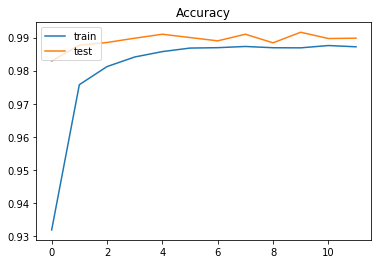

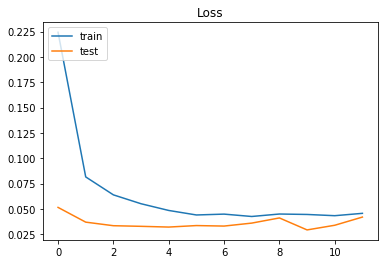

In [63]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 입력과 출력 지정하기
in_shape = (28, 28, 1)
out_size = 10
# MNIST 데이터 읽어 들이기
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 읽어들인 데이터를 3차원 배열로 변환하기
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
# 레이블 데이터를 One-hot 형식으로 변환하기
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)
# CNN모델의 구조 정의하기 --- (*2)
# Conv2D:합성곱 레이어 생성, 이미지의 특징량에 대해 합성곱 처리
# MaxPooling2D:풀링 레이어 생성, 이미지의 특징을 남긴 상태로 압축
# Flatten:블러 처리
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=in_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation='softmax'))
# 모델 구축하기 --- (*3)
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
# 학습 실행하기 --- (*4)
hist = model.fit(X_train, y_train, batch_size=128, epochs=12, verbose=1,
validation_data=(X_test, y_test))
# 모델 평가하기 --- (*5)
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])
# 학습 상태를 그래프로 그리기 --- (*6)
# 정답률 추이를 그래프로 그리기
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')

plt.legend(['train', 'test'], loc='upper left')
plt.show()
# 손실 추이를 그래프로 그리기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()